In [17]:
import pandas as pd
import numpy as np
%matplotlib inline

In [18]:
vt = pd.read_csv("VT_police.csv")
vt.head()

c:\users\sitra\anaconda3\envs\pythondata\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location,police_department,driver_gender,...,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id
0,VT-2010-00001,VT,2010-07-01,00:10,East Montpelier,Washington County,50023.0,COUNTY RD,MIDDLESEX VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Citation,False,-1.562157e+09
1,VT-2010-00002,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
2,VT-2010-00003,VT,2010-07-01,00:10,NaN,NaN,NaN,COUNTY RD; Fitch Road,MIDDLESEX VSP,F,...,White,Externally Generated Stop,Other,False,No Search Conducted,NaN,False,Arrest for Violation,True,-1.562157e+09
3,VT-2010-00004,VT,2010-07-01,00:11,Whiting,Addison County,50001.0,N MAIN ST,NEW HAVEN VSP,F,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Arrest for Violation,True,-3.126844e+08
4,VT-2010-00005,VT,2010-07-01,00:35,Hardwick,Caledonia County,50005.0,i91 nb mm 62,ROYALTON VSP,M,...,White,Moving Violation,Moving violation,False,No Search Conducted,NaN,False,Written Warning,False,9.225661e+08


In [19]:
vt.shape

(283285, 23)

In [20]:
vt.dtypes

id                        object
state                     object
stop_date                 object
stop_time                 object
location_raw              object
county_name               object
county_fips              float64
fine_grained_location     object
police_department         object
driver_gender             object
driver_age_raw           float64
driver_age               float64
driver_race_raw           object
driver_race               object
violation_raw             object
violation                 object
search_conducted            bool
search_type_raw           object
search_type               object
contraband_found          object
stop_outcome              object
is_arrested                 bool
officer_id               float64
dtype: object

In [21]:
vt.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                694
county_name                 705
county_fips                 705
fine_grained_location       347
police_department             0
driver_gender              1712
driver_age_raw             1171
driver_age                 1286
driver_race_raw            3984
driver_race                4817
violation_raw              2178
violation                  2178
search_conducted              0
search_type_raw            2240
search_type              279866
contraband_found             34
stop_outcome               2325
is_arrested                   0
officer_id                   12
dtype: int64

In [28]:
vt.violation.value_counts()

Moving violation      218302
Equipment              51934
Other                  10120
DUI                      749
Other (non-mapped)         2
Name: violation, dtype: int64

In [29]:
# vt.drop('search_type', axis='columns', inplace=True)

In [27]:
vt.shape

(283285, 23)

In [30]:
# when someone is stopped for DUI, how often is it a man or woman?
vt[vt.violation == 'DUI'].driver_gender.value_counts(normalize=True)

M    0.718291
F    0.281709
Name: driver_gender, dtype: float64

In [31]:
vt.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation         
F              Moving violation      0.774360
               Equipment             0.188631
               Other                 0.034926
               DUI                   0.002083
M              Moving violation      0.778316
               Equipment             0.182092
               Other                 0.036561
               DUI                   0.003020
               Other (non-mapped)    0.000011
Name: violation, dtype: float64

In [33]:
# search rate by gender
vt.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.006713
M    0.015105
Name: search_conducted, dtype: float64

In [35]:
# search % rate by driver_race
vt.groupby('driver_race').search_conducted.mean()*100

driver_race
Asian       0.803992
Black       5.086222
Hispanic    4.038095
Other       3.942652
White       1.103991
Name: search_conducted, dtype: float64

In [37]:
# search % rate arrested by driver_race
vt.groupby('driver_race').is_arrested.mean()*100

driver_race
Asian       0.609925
Black       2.125065
Hispanic    1.752381
Other       2.508961
White       1.174234
Name: is_arrested, dtype: float64

In [39]:
# search rate by gender
vt.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.006713
M    0.015105
Name: search_conducted, dtype: float64

In [41]:
# include a second factor
vt.groupby(['violation', 'driver_gender']).search_conducted.mean()*100

violation           driver_gender
DUI                 F                 2.369668
                    M                10.037175
Equipment           F                 0.900382
                    M                 2.210030
Moving violation    F                 0.508792
                    M                 1.148041
Other               F                 2.912072
                    M                 5.188824
Other (non-mapped)  M                 0.000000
Name: search_conducted, dtype: float64

In [42]:
# maybe search_type is missing any time search_conducted is False?
vt.search_conducted.value_counts()

False    279866
True       3419
Name: search_conducted, dtype: int64

In [43]:
# test that theory, why is the Series empty?
vt[vt.search_conducted == False].search_type.value_counts()
# value_counts ignores missing values by default

Series([], Name: search_type, dtype: int64)

In [44]:
# when search_conducted is True, search_type is never missing
vt[vt.search_conducted == True].search_type.value_counts(dropna=False)

Consent Search - Probable Cause          2321
Consent Search - Reasonable Suspicion     879
Warrant                                   219
Name: search_type, dtype: int64

In [46]:
# this works, but there's a better way
vt.stop_date.str.slice(0, 4).value_counts()

2013    57235
2014    54689
2012    52568
2011    48652
2015    45662
2010    24479
Name: stop_date, dtype: int64

In [47]:
# make sure you create this column
combined = vt.stop_date.str.cat(vt.stop_time, sep=' ')
vt['stop_datetime'] = pd.to_datetime(combined)

In [49]:
# why is 2010 so much smaller?
vt.stop_datetime.dt.year.value_counts()

2013    57235
2014    54689
2012    52568
2011    48652
2015    45662
2010    24479
Name: stop_datetime, dtype: int64

In [53]:
vt.is_arrested.mean()

0.011758476445981962

In [54]:
vt.search_conducted.mean()

0.012069117673014808

In [55]:
# can't groupby 'hour' unless you create it as a column
vt.groupby(vt.stop_datetime.dt.hour).is_arrested.mean()

stop_datetime
0     0.025741
1     0.034568
2     0.045061
3     0.048387
4     0.040881
5     0.011327
6     0.008744
7     0.003947
8     0.006402
9     0.005936
10    0.005961
11    0.007286
12    0.009218
13    0.007953
14    0.009376
15    0.007283
16    0.009314
17    0.009838
18    0.010049
19    0.012618
20    0.016145
21    0.015152
22    0.019930
23    0.021323
Name: is_arrested, dtype: float64

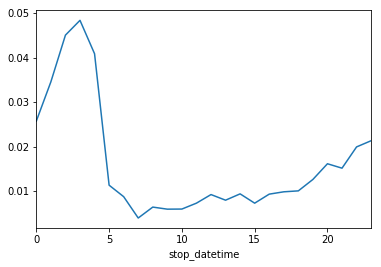

In [56]:
# line plot by default (for a Series)
vt.groupby(vt.stop_datetime.dt.hour).is_arrested.mean().plot()

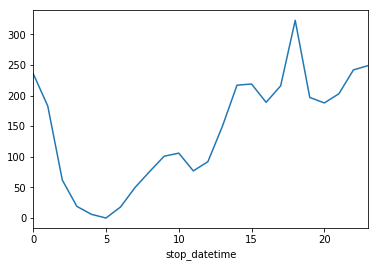

In [57]:
# alternative: count search conducted stops by hour
vt.groupby(vt.stop_datetime.dt.hour).search_conducted.sum().plot()

In [58]:
vt.stop_datetime.dt.hour.value_counts()

18    26370
17    23888
15    20184
16    19003
14    17492
9     16847
19    15930
8     15152
10    14427
13    13203
23    12897
22    12544
21    11616
20    10963
11    10842
0     10567
12     9330
7      8614
1      6451
6      3088
2      2197
3       744
5       618
4       318
Name: stop_datetime, dtype: int64

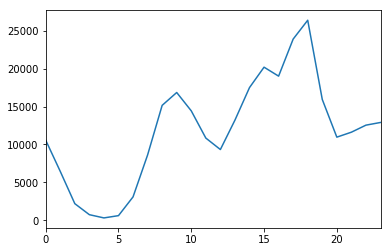

In [59]:
vt.stop_datetime.dt.hour.value_counts().sort_index().plot()

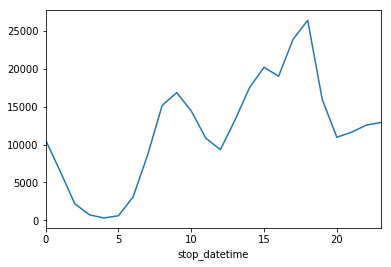

In [61]:
# alternative method
vt.groupby(vt.stop_datetime.dt.hour).stop_date.count().plot()

In [67]:
vt.groupby('county_name').search_conducted.value_counts(normalize=True)

county_name        search_conducted
Addison County     False               0.984130
                   True                0.015870
Bennington County  False               0.985652
                   True                0.014348
Caledonia County   False               0.993596
                   True                0.006404
Chittenden County  False               0.989011
                   True                0.010989
Essex County       False               0.997057
                   True                0.002943
Franklin County    False               0.989001
                   True                0.010999
Grand Isle County  False               0.979554
                   True                0.020446
Lamoille County    False               0.973719
                   True                0.026281
Orange County      False               0.992342
                   True                0.007658
Orleans County     False               0.998587
                   True                0.001413
Rutl

In [69]:
vt.groupby('county_name').search_conducted.value_counts(normalize=True)

county_name        search_conducted
Addison County     False               0.984130
                   True                0.015870
Bennington County  False               0.985652
                   True                0.014348
Caledonia County   False               0.993596
                   True                0.006404
Chittenden County  False               0.989011
                   True                0.010989
Essex County       False               0.997057
                   True                0.002943
Franklin County    False               0.989001
                   True                0.010999
Grand Isle County  False               0.979554
                   True                0.020446
Lamoille County    False               0.973719
                   True                0.026281
Orange County      False               0.992342
                   True                0.007658
Orleans County     False               0.998587
                   True                0.001413
Rutl

In [70]:
# good first step
vt.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
DUI,746.0,38.306971,16.225868,16.0,24.00,35.0,50.00,96.0
Equipment,51660.0,37.191250,14.722370,15.0,25.00,34.0,48.00,96.0
Moving violation,217567.0,39.386359,15.774591,15.0,25.00,37.0,51.00,99.0
Other,9982.0,34.919856,14.107755,15.0,24.00,31.0,44.00,96.0
Other (non-mapped),2.0,63.500000,24.748737,46.0,54.75,63.5,72.25,81.0


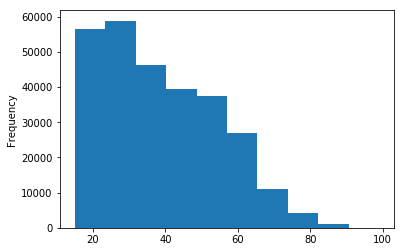

In [71]:
vt.driver_age.plot(kind='hist')

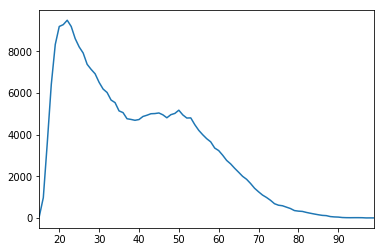

In [72]:
# similar to a histogram
vt.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000277089120B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000027708DCD828>]], dtype=object)

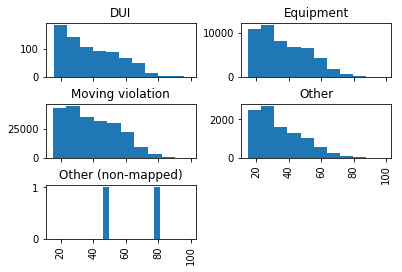

In [73]:
# what changed? how is this better or worse?
vt.hist('driver_age', by='violation', sharex=True)

In [74]:
vt['new_age'] = vt.stop_datetime.dt.year - vt.driver_age_raw

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027709A017F0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000277089A69B0>]], dtype=object)

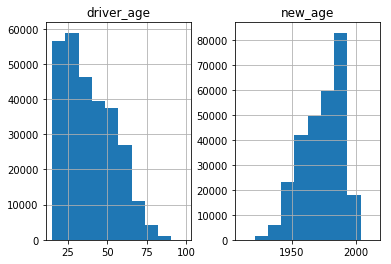

In [76]:
# compare the distributions
vt[['driver_age', 'new_age']].hist()

In [78]:
vt[['driver_age', 'new_age','driver_age_raw']]

,driver_age,new_age,driver_age_raw
0,22.0,1988.0,22.0
1,21.0,1989.0,21.0
2,21.0,1989.0,21.0
3,18.0,1992.0,18.0
4,18.0,1992.0,18.0
5,20.0,1990.0,20.0
6,21.0,1989.0,21.0
7,40.0,1970.0,40.0
8,24.0,1986.0,24.0
9,19.0,1991.0,19.0
